In [260]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [261]:
df = pd.read_csv("Customer-Churn-Records.csv")

In [262]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464.0
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456.0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377.0
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350.0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425.0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           5023 non-null   int64  
 1   CustomerId          5023 non-null   int64  
 2   Surname             5023 non-null   object 
 3   CreditScore         5019 non-null   float64
 4   Geography           5023 non-null   object 
 5   Gender              5023 non-null   object 
 6   Age                 5012 non-null   float64
 7   Tenure              5023 non-null   int64  
 8   Balance             5018 non-null   float64
 9   NumOfProducts       5023 non-null   int64  
 10  HasCrCard           5023 non-null   int64  
 11  IsActiveMember      5023 non-null   int64  
 12  EstimatedSalary     5016 non-null   float64
 13  Exited              5023 non-null   int64  
 14  Complain            5023 non-null   int64  
 15  Satisfaction Score  5023 non-null   int64  
 16  Card T

## Thay thế các dữ liệu bị thiếu bằng giá trị trung bình 

In [264]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  
        column_mean = df[column].mean()  
        df[column].fillna(column_mean, inplace=True) 


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           5023 non-null   int64  
 1   CustomerId          5023 non-null   int64  
 2   Surname             5023 non-null   object 
 3   CreditScore         5023 non-null   float64
 4   Geography           5023 non-null   object 
 5   Gender              5023 non-null   object 
 6   Age                 5023 non-null   float64
 7   Tenure              5023 non-null   int64  
 8   Balance             5023 non-null   float64
 9   NumOfProducts       5023 non-null   int64  
 10  HasCrCard           5023 non-null   int64  
 11  IsActiveMember      5023 non-null   int64  
 12  EstimatedSalary     5023 non-null   float64
 13  Exited              5023 non-null   int64  
 14  Complain            5023 non-null   int64  
 15  Satisfaction Score  5023 non-null   int64  
 16  Card T

## Loại bỏ những cột dữ liệu không cần thiết

In [266]:
df.drop(columns=["RowNumber", "CustomerId", "Surname" ], inplace=True)

## Đếm số lượng giá trị duy nhất


In [267]:
df.nunique()

CreditScore            444
Geography                3
Gender                   2
Age                     69
Tenure                  11
Balance               3224
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       5016
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

In [268]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464.0
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456.0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377.0
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350.0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425.0


## Đồ thị biểu diễn cột Exited 

Exited
0    3968
1    1055
Name: count, dtype: int64


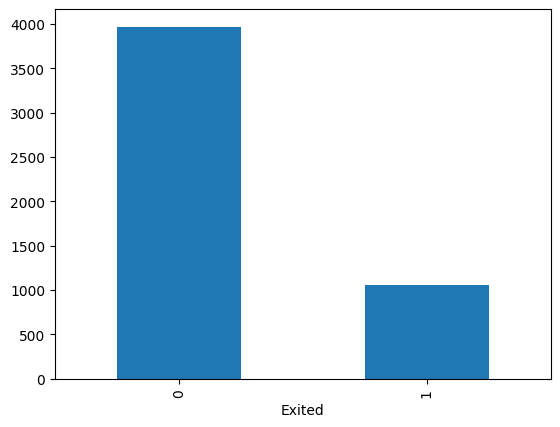

In [269]:
g = df['Exited'].value_counts()
print(g)
g.plot.bar()
plt.show()

## Đồ thị biểu diễn các giá trị rời rạc 

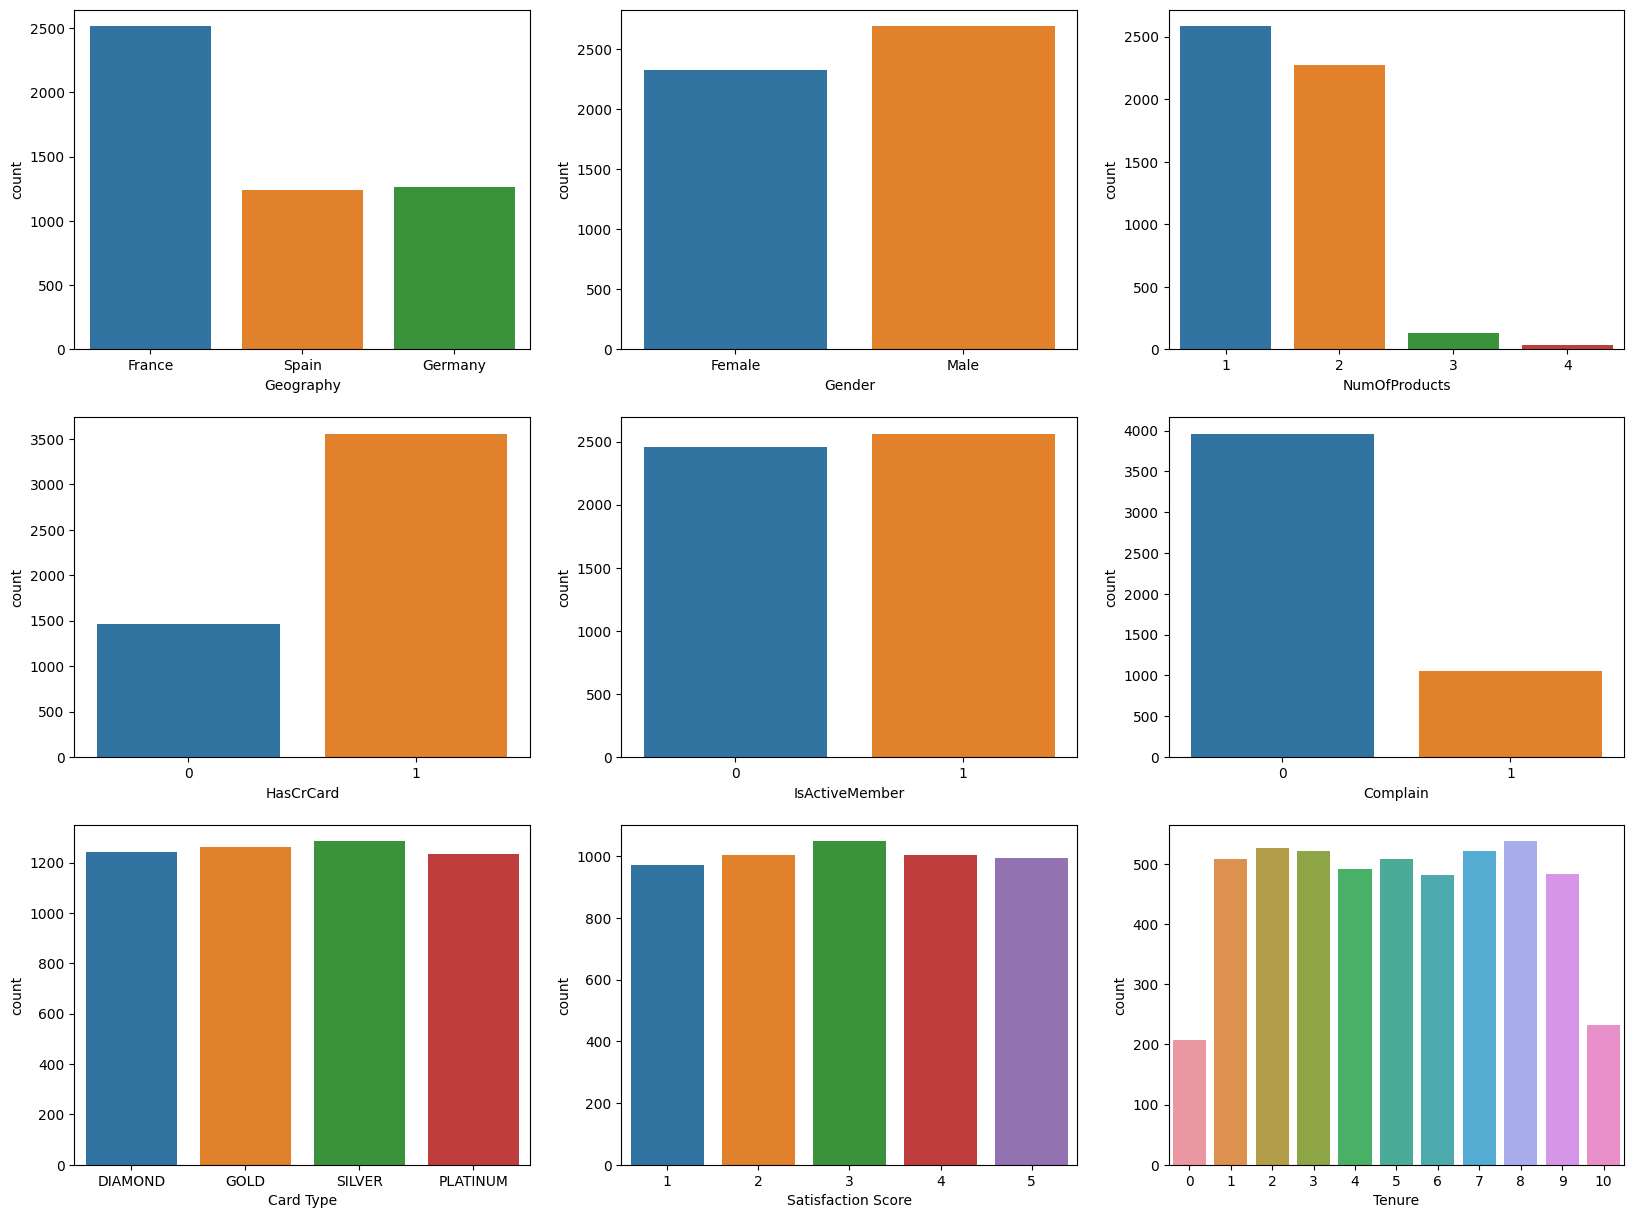

In [270]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))
sns.countplot ( ax = axes[0, 0], data = df, x = "Geography")
sns.countplot ( ax = axes[0, 1], data = df, x = "Gender")
sns.countplot ( ax = axes[0, 2], data = df, x = "NumOfProducts")
sns.countplot ( ax = axes[1, 0], data = df, x = "HasCrCard")
sns.countplot ( ax = axes[1, 1], data = df, x = "IsActiveMember")
sns.countplot ( ax = axes[1, 2], data = df, x = "Complain")
sns.countplot ( ax = axes[2, 0], data = df, x = "Card Type")
sns.countplot ( ax = axes[2, 1], data = df, x = "Satisfaction Score")
sns.countplot ( ax = axes[2, 2], data = df, x = "Tenure")
plt.show()

## Đồ thị biểu diễn các giá trị liên tục

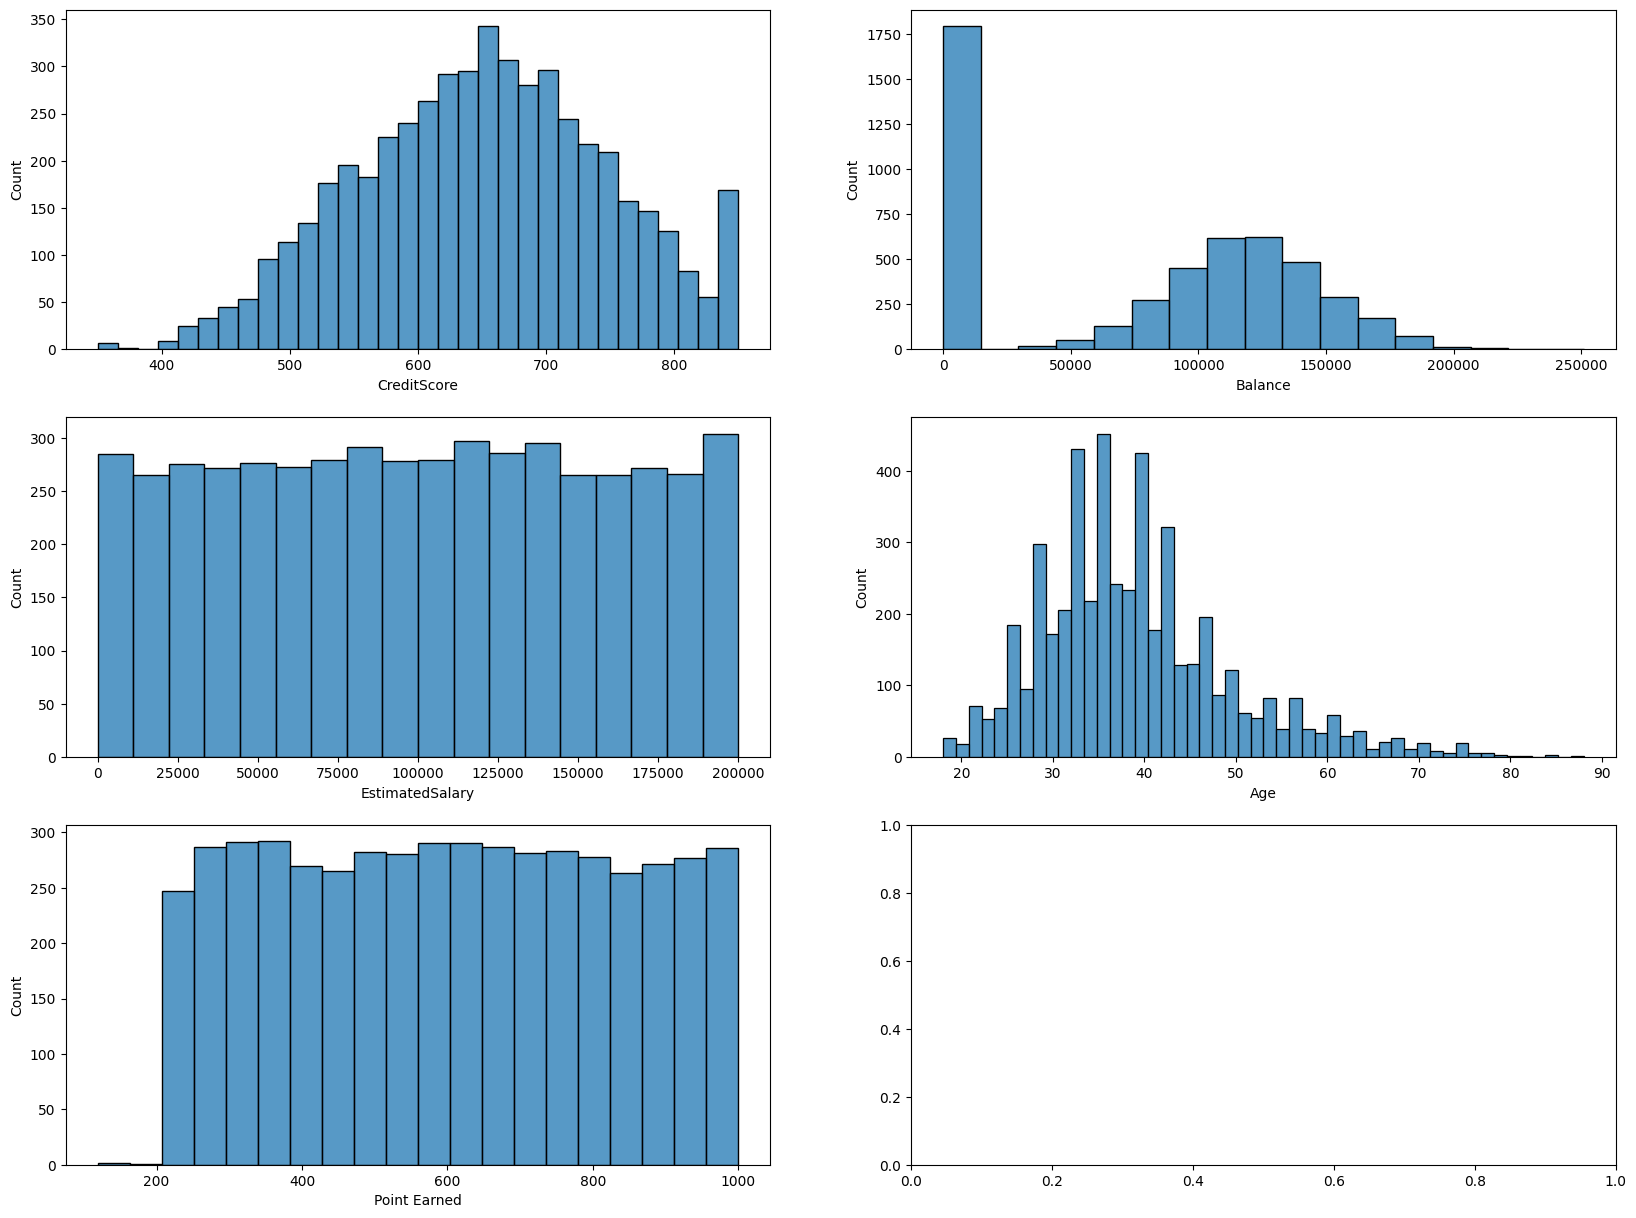

In [271]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.histplot ( ax = axes[0, 0], data = df, x = "CreditScore")
sns.histplot ( ax = axes[0, 1], data = df, x = "Balance")
sns.histplot ( ax = axes[1, 0], data = df, x = "EstimatedSalary")
sns.histplot ( ax = axes[1, 1], data = df, x = "Age")
sns.histplot ( ax = axes[2, 0], data = df, x = "Point Earned")
plt.show()

## Đồ thị biểu diễn mối liên quan giữa cột "Exit" và các cột chứa giá trị rời rạc

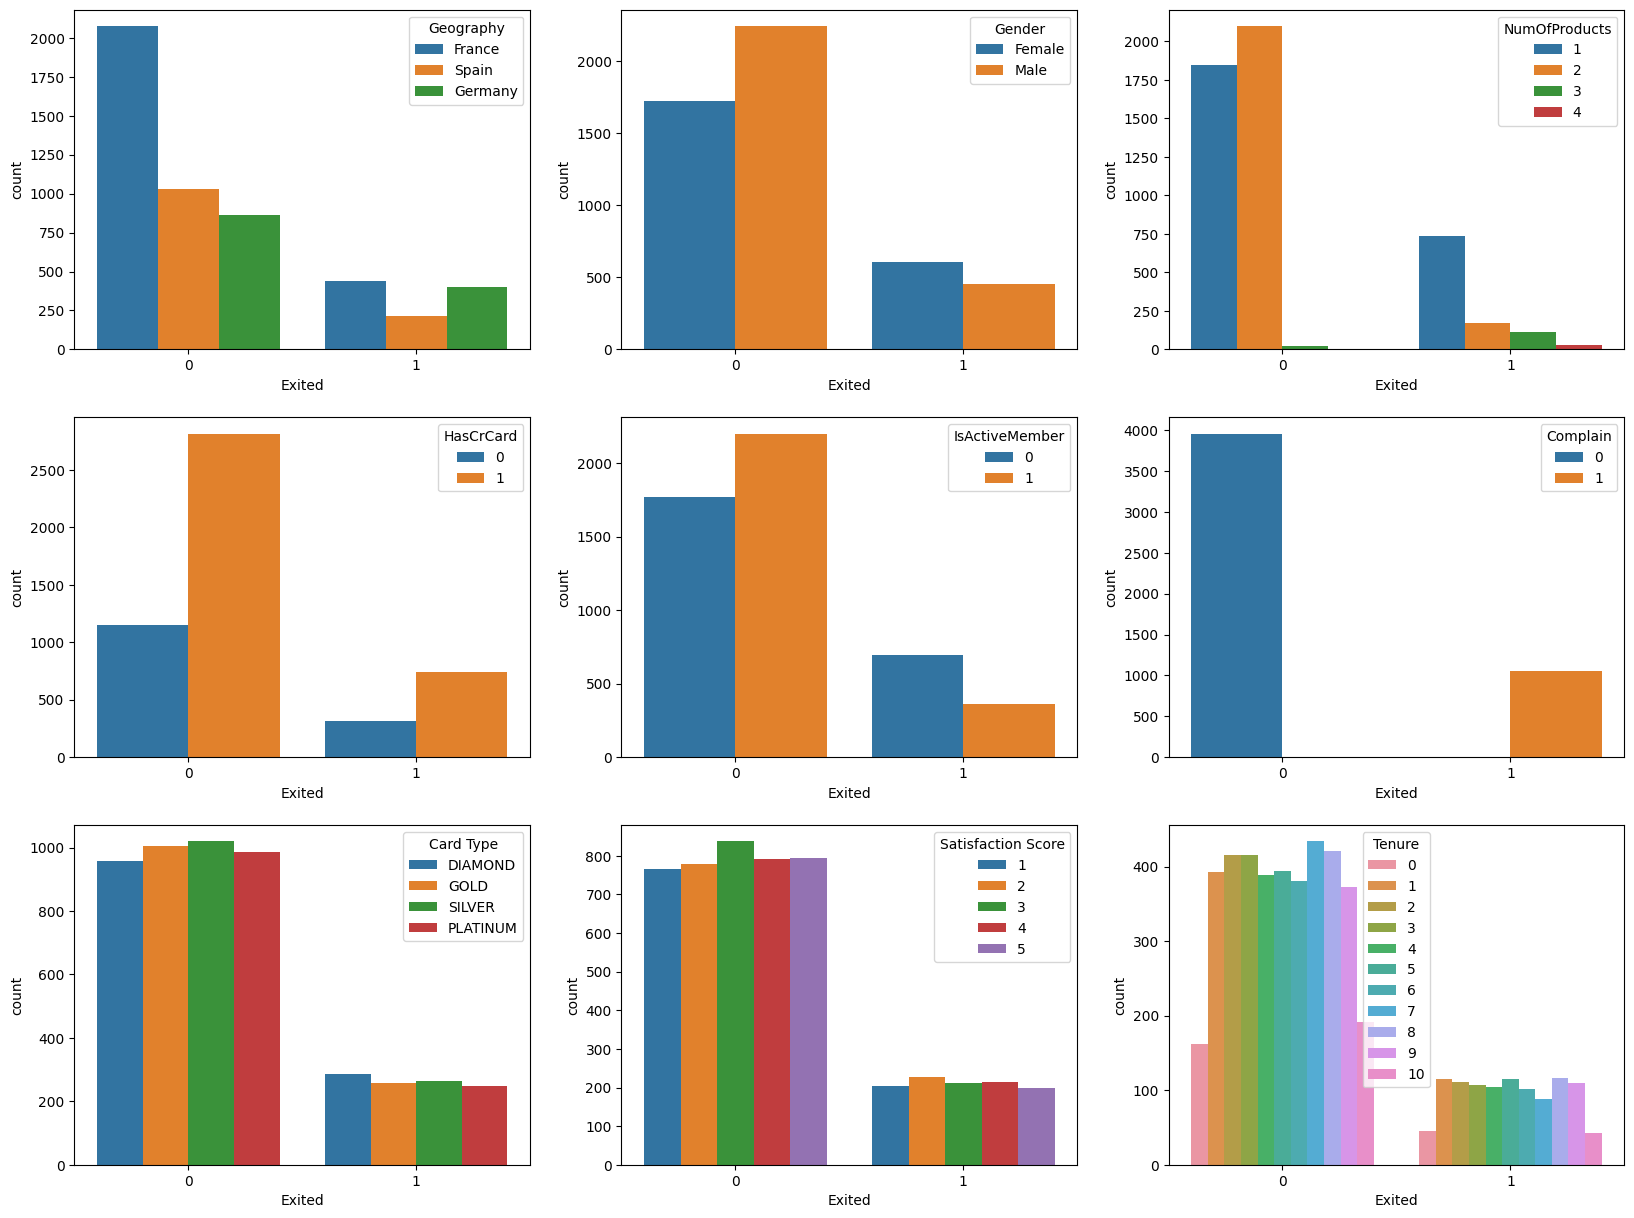

In [272]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))
sns.countplot ( ax = axes[0, 0], data = df, x = "Exited", hue = "Geography")
sns.countplot ( ax = axes[0, 1], data = df, x = "Exited", hue = "Gender")
sns.countplot ( ax = axes[0, 2], data = df, x = "Exited", hue = "NumOfProducts")
sns.countplot ( ax = axes[1, 0], data = df, x = "Exited", hue = "HasCrCard")
sns.countplot ( ax = axes[1, 1], data = df, x = "Exited", hue = "IsActiveMember")
sns.countplot ( ax = axes[1, 2], data = df, x = "Exited", hue = "Complain")
sns.countplot ( ax = axes[2, 0], data = df, x = "Exited", hue = "Card Type")
sns.countplot ( ax = axes[2, 1], data = df, x = "Exited", hue = "Satisfaction Score")
sns.countplot ( ax = axes[2, 2], data = df, x = "Exited", hue = "Tenure")
plt.show()

## Đồ thị biểu diễn mối liên quan giữa cột "Exit" và các cột chứa giá trị liên tục


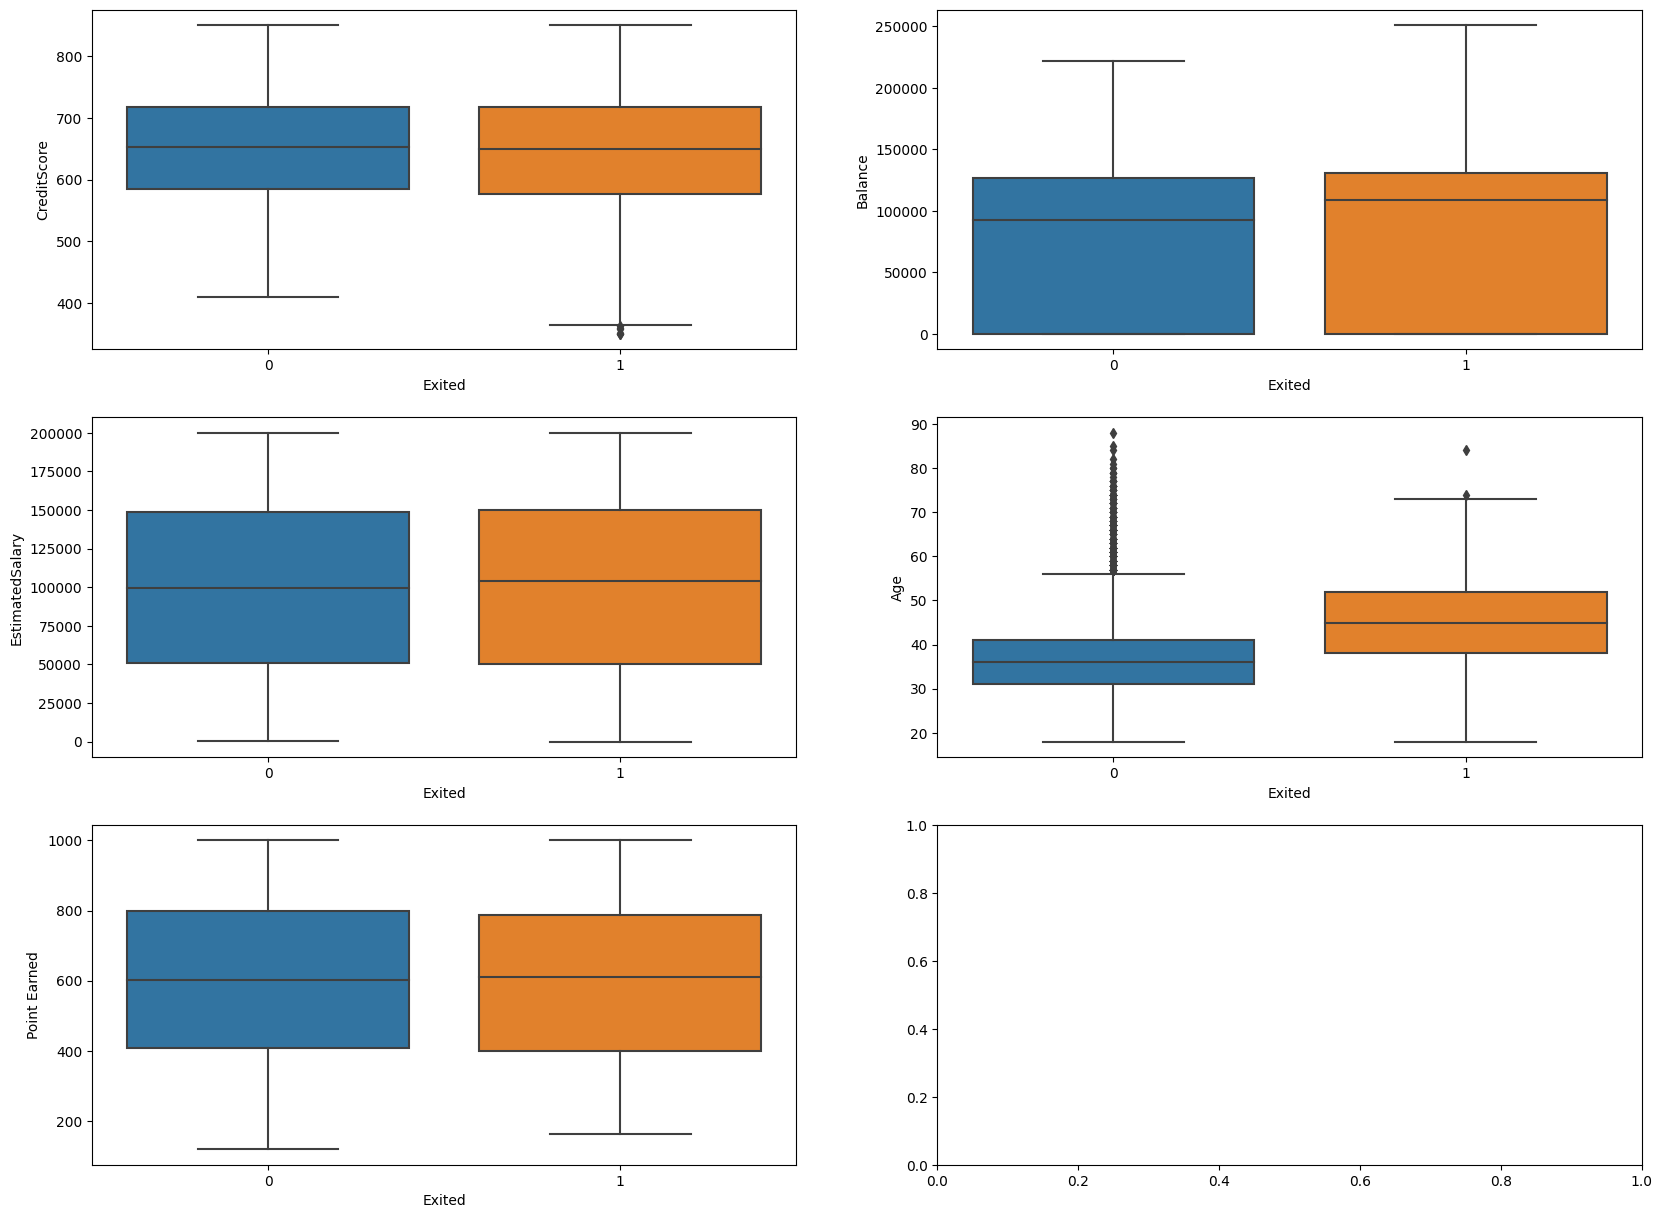

In [273]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.boxplot ( ax = axes[0, 0], data = df, x = "Exited", y = "CreditScore")
sns.boxplot ( ax = axes[0, 1], data = df, x = "Exited", y = "Balance")
sns.boxplot ( ax = axes[1, 0], data = df, x = "Exited", y = "EstimatedSalary")
sns.boxplot ( ax = axes[1, 1], data = df, x = "Exited", y = "Age")
sns.boxplot ( ax = axes[2, 0], data = df, x = "Exited", y = "Point Earned")
plt.show()

## Loại bỏ một số cột không cần thiết 

In [274]:
df.drop(columns=["Card Type", "Satisfaction Score", "Point Earned", "Complain" ], inplace=True)
#df.drop(columns=["Complain" ], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# Data Transform 

In [275]:
## chuyển đổi dữ liệu
types = df.dtypes
names = list(df.columns)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

## Lựa chọn dữ liệu

In [276]:
columns_to_select = df.columns[df.columns != 'Exited']
X = df.loc[:, columns_to_select]
y = df.iloc[:, df.columns.get_loc('Exited')]

#X.head()
y.head()
#print(X.shape)
#print(y.shape)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.538      0.         0.         0.34285714 0.2        0.
 0.         1.         1.         0.50678999]


## Phân chia dữ liệu (Train = 70%, Test = 30%)

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=  42)
print(len(X_train), len(X_test), len(y_train), len(y_test))


3516 1507 3516 1507


## Xây dựng Model cho thuật toán KNN và thực hiện đánh giá

K = 1, F1 = 0.4416403785488959, Precision = 0.45751633986928103, , Recall = 0.4268292682926829
K = 2, F1 = 0.27664399092970515, Precision = 0.5398230088495575, , Recall = 0.18597560975609756
K = 3, F1 = 0.4220183486238532, Precision = 0.5299539170506913, , Recall = 0.35060975609756095
K = 4, F1 = 0.28240740740740744, Precision = 0.5865384615384616, , Recall = 0.18597560975609756
K = 5, F1 = 0.3531827515400411, Precision = 0.5408805031446541, , Recall = 0.2621951219512195
K = 6, F1 = 0.2755344418052256, Precision = 0.6236559139784946, , Recall = 0.17682926829268292
K = 7, F1 = 0.3448275862068965, Precision = 0.5882352941176471, , Recall = 0.24390243902439024
K = 8, F1 = 0.25552825552825553, Precision = 0.6582278481012658, , Recall = 0.15853658536585366
K = 9, F1 = 0.3090909090909091, Precision = 0.6071428571428571, , Recall = 0.2073170731707317


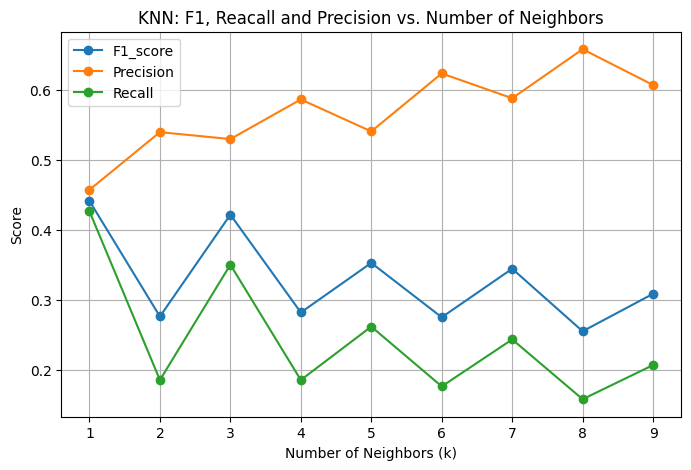

In [279]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
# Khởi tạo các danh sách để lưu giá trị
k_values = []
f1_scores = []
precision_scores = []
recall_scores = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    
    
    f1 = f1_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    
    
    print(f"K = {k}, F1 = {f1}, Precision = {precision}, , Recall = {recall}")

    # Lưu giá trị của k, accuracy score và precision score vào danh sách tương ứng
    k_values.append(k)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    


# Vẽ đồ thị
plt.figure(figsize=(8, 5))

plt.plot(k_values, f1_scores, marker='o', label='F1_score')
plt.plot(k_values, precision_scores, marker='o', label='Precision')
plt.plot(k_values, recall_scores, marker = 'o', label = 'Recall')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN: F1, Reacall and Precision vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


## Mô hình hồi quy ridge để xử lý Overfitting

Alpha = 0.1, F1 = 0.16020671834625325, Precision = 0.5254237288135594, Recall = 0.09451219512195122
Alpha = 1, F1 = 0.16020671834625325, Precision = 0.5254237288135594, Recall = 0.09451219512195122
Alpha = 10, F1 = 0.14130434782608697, Precision = 0.65, Recall = 0.07926829268292683
Alpha = 100, F1 = 0.0, Precision = 0.0, Recall = 0.0


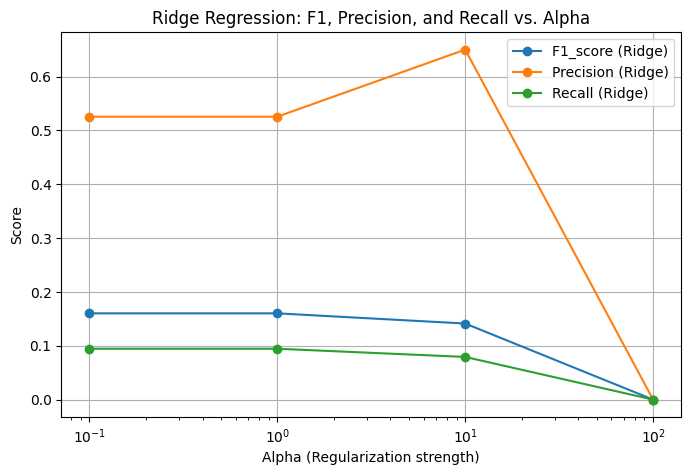

In [280]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline



# Standardize features to have mean=0 and variance=1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize lists to store values
ridge_f1_scores = []
ridge_precision_scores = []
ridge_recall_scores = []

alpha_values = [0.1, 1, 10, 100]  # Varying alpha values for regularization

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_predict_ridge = ridge.predict(X_test_scaled)
    # Assuming y_predict_ridge contains predicted values for regression

    # Evaluate the model
    f1_ridge = f1_score(y_test, y_predict_ridge.round())  # Adjust predictions if needed
    precision_ridge = precision_score(y_test, y_predict_ridge.round())
    recall_ridge = recall_score(y_test, y_predict_ridge.round())

    print(f"Alpha = {alpha}, F1 = {f1_ridge}, Precision = {precision_ridge}, Recall = {recall_ridge}")

    # Append scores to lists
    ridge_f1_scores.append(f1_ridge)
    ridge_precision_scores.append(precision_ridge)
    ridge_recall_scores.append(recall_ridge)

# Plotting Ridge regression scores
plt.figure(figsize=(8, 5))

plt.plot(alpha_values, ridge_f1_scores, marker='o', label='F1_score (Ridge)')
plt.plot(alpha_values, ridge_precision_scores, marker='o', label='Precision (Ridge)')
plt.plot(alpha_values, ridge_recall_scores, marker='o', label='Recall (Ridge)')

plt.xlabel('Alpha (Regularization strength)')
plt.ylabel('Score')
plt.title('Ridge Regression: F1, Precision, and Recall vs. Alpha')
plt.xscale('log')  # Using logarithmic scale for alpha values
plt.legend()
plt.grid(True)
plt.show()


## Xây dựng model cho thuật toán Decision Tree và thực hiện đánh giá 

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


depth = 1, F1 = 0.0, Precision = 0.0, , Recall = 0.0
depth = 2, F1 = 0.5638095238095239, Precision = 0.751269035532995, , Recall = 0.45121951219512196
depth = 3, F1 = 0.5921787709497207, Precision = 0.7607655502392344, , Recall = 0.4847560975609756
depth = 4, F1 = 0.5638945233265721, Precision = 0.8424242424242424, , Recall = 0.42378048780487804
depth = 5, F1 = 0.5984251968503936, Precision = 0.8444444444444444, , Recall = 0.4634146341463415
depth = 6, F1 = 0.5617529880478087, Precision = 0.8103448275862069, , Recall = 0.4298780487804878
depth = 7, F1 = 0.5366795366795366, Precision = 0.7315789473684211, , Recall = 0.42378048780487804
depth = 8, F1 = 0.5419847328244276, Precision = 0.7244897959183674, , Recall = 0.4329268292682927
depth = 9, F1 = 0.5162454873646208, Precision = 0.6327433628318584, , Recall = 0.43597560975609756


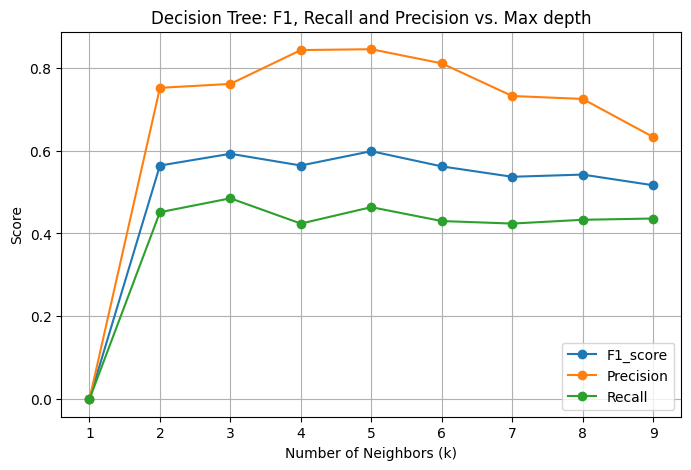

In [281]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# Khởi tạo các danh sách để lưu giá trị
depth_values = []
f1_scores = []
precision_scores = []
recall_scores = []

for depth in range(1, 10):
    reg = DecisionTreeClassifier(max_depth=depth, random_state=0)
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    
    f1 = f1_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)  
    
    print(f"depth = {depth}, F1 = {f1}, Precision = {precision}, , Recall = {recall}")


    # Lưu giá trị của depth, f1 score và precision score vào danh sách tương ứng
    depth_values.append(depth)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Vẽ đồ thị
plt.figure(figsize=(8, 5))

plt.plot(depth_values, f1_scores, marker='o', label='F1_score')
plt.plot(depth_values, precision_scores, marker='o', label='Precision')
plt.plot(depth_values, recall_scores, marker = 'o', label = 'Recall')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Decision Tree: F1, Recall and Precision vs. Max depth')
plt.legend()
plt.grid(True)
plt.show()



## Xử lý Overfitting

Alpha = 0.01, F1 = 0.16020671834625325, Precision = 0.5254237288135594, Recall = 0.09451219512195122
Alpha = 0.1, F1 = 0.16020671834625325, Precision = 0.5254237288135594, Recall = 0.09451219512195122
Alpha = 1, F1 = 0.1606217616580311, Precision = 0.5344827586206896, Recall = 0.09451219512195122
Alpha = 10, F1 = 0.1362397820163488, Precision = 0.6410256410256411, Recall = 0.07621951219512195
Alpha = 100, F1 = 0.0, Precision = 0.0, Recall = 0.0


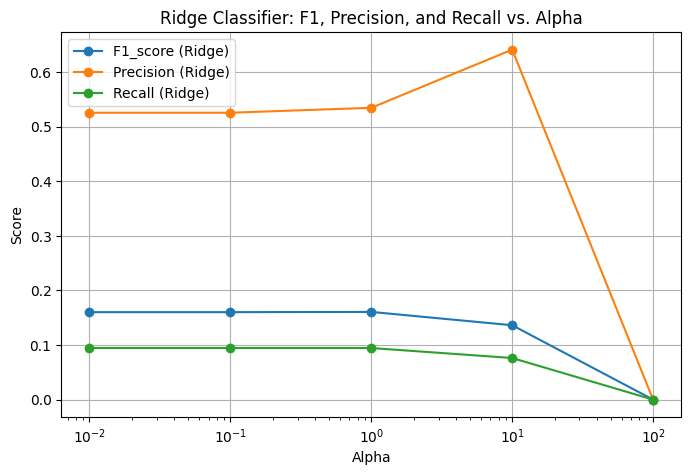

In [282]:
from sklearn.linear_model import RidgeClassifier

alpha_values = [0.01, 0.1, 1, 10, 100]  # Các giá trị alpha để thử nghiệm

ridge_f1_scores = []
ridge_precision_scores = []
ridge_recall_scores = []

for alpha in alpha_values:
    ridge = RidgeClassifier(alpha=alpha, random_state=0)
    ridge.fit(X_train, y_train)
    y_predict_ridge = ridge.predict(X_test)
    
    # Đánh giá mô hình Ridge
    f1_ridge = f1_score(y_test, y_predict_ridge)
    precision_ridge = precision_score(y_test, y_predict_ridge)
    recall_ridge = recall_score(y_test, y_predict_ridge)

    print(f"Alpha = {alpha}, F1 = {f1_ridge}, Precision = {precision_ridge}, Recall = {recall_ridge}")

    # Lưu các giá trị vào danh sách tương ứng
    ridge_f1_scores.append(f1_ridge)
    ridge_precision_scores.append(precision_ridge)
    ridge_recall_scores.append(recall_ridge)

# Vẽ đồ thị cho mô hình Ridge
plt.figure(figsize=(8, 5))

plt.plot(alpha_values, ridge_f1_scores, marker='o', label='F1_score (Ridge)')
plt.plot(alpha_values, ridge_precision_scores, marker='o', label='Precision (Ridge)')
plt.plot(alpha_values, ridge_recall_scores, marker='o', label='Recall (Ridge)')

plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Ridge Classifier: F1, Precision, and Recall vs. Alpha')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


## Xác định các feature quan trọng đối với thuật toán

feat importance = [0.09599811 0.02565712 0.01388966 0.31515773 0.03650178 0.10438377
 0.21289809 0.00790032 0.10006253 0.08755089]
                 Importance
CreditScore        0.095998
Geography          0.025657
Gender             0.013890
Age                0.315158
Tenure             0.036502
Balance            0.104384
NumOfProducts      0.212898
HasCrCard          0.007900
IsActiveMember     0.100063
EstimatedSalary    0.087551


<Axes: >

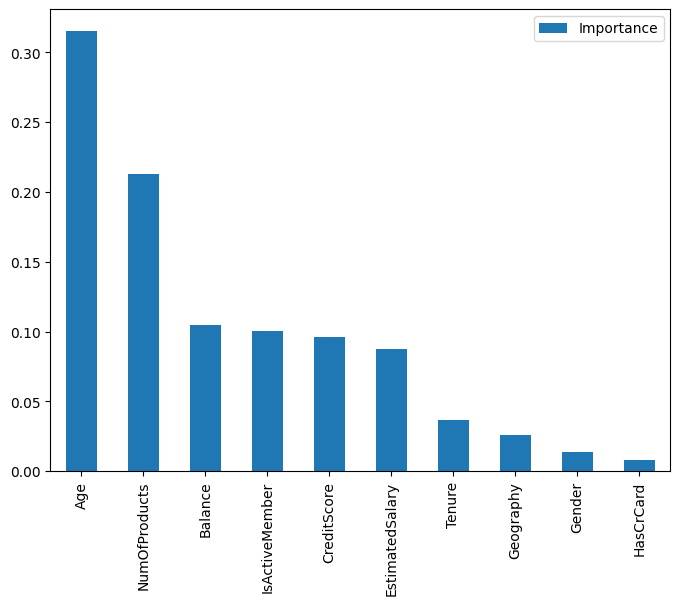

In [283]:
feat_importance = reg.feature_importances_
print("feat importance = " + str(feat_importance))
feat_importances = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=["Importance"])
print(feat_importances)
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8, 6))


## Xây dựng model cho thuật toán Logistic Regression và thực hiện đánh giá 

Max_iter = 100, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 1000, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 1500, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 5000, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 10000, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 15000, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 50000, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292
Max_iter = 100000, F1 = 0.2748815165876777, Precision = 0.6170212765957447, , Recall = 0.17682926829268292


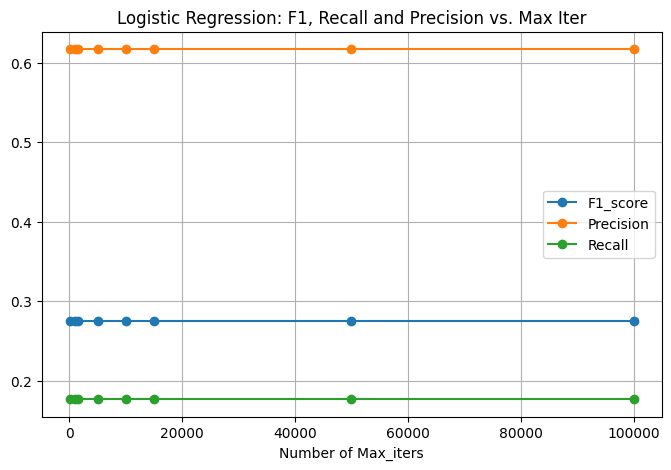

In [284]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

max_iters = [100, 1000, 1500, 5000, 10000, 15000, 50000, 100000]
f1_scores = []
precision_scores = []
recall_scores = []

for i in max_iters:
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    
    f1 = f1_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)  
    
    print(f"Max_iter = {i}, F1 = {f1}, Precision = {precision}, , Recall = {recall}")
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Vẽ đồ thị
plt.figure(figsize=(8, 5))

plt.plot(max_iters, f1_scores, marker='o', label='F1_score')
plt.plot(max_iters, precision_scores, marker='o', label='Precision')
plt.plot(max_iters, recall_scores, marker = 'o', label = 'Recall')

plt.xlabel('Number of Max_iters')
plt.title('Logistic Regression: F1, Recall and Precision vs. Max Iter')
plt.legend()
plt.grid(True)
plt.show()
    


## Xử lý Overfitting

Alpha = 0.01, F1 = 0.16020671834625325, Precision = 0.5254237288135594, Recall = 0.09451219512195122
Alpha = 0.1, F1 = 0.16020671834625325, Precision = 0.5254237288135594, Recall = 0.09451219512195122
Alpha = 1, F1 = 0.1606217616580311, Precision = 0.5344827586206896, Recall = 0.09451219512195122
Alpha = 10, F1 = 0.1362397820163488, Precision = 0.6410256410256411, Recall = 0.07621951219512195
Alpha = 100, F1 = 0.0, Precision = 0.0, Recall = 0.0


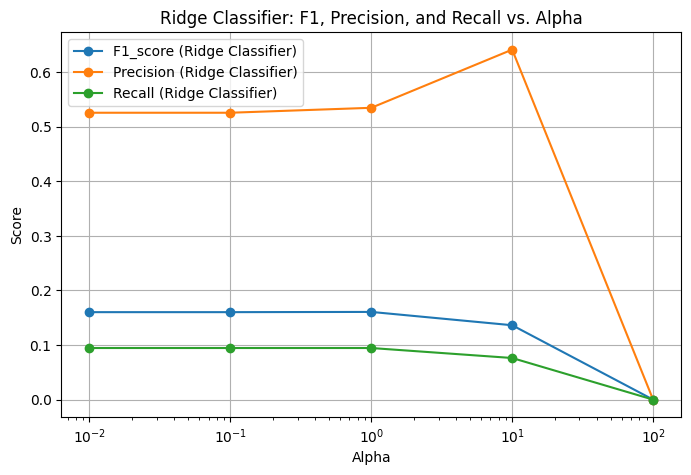

In [285]:
from sklearn.linear_model import RidgeClassifier

alpha_values = [0.01, 0.1, 1, 10, 100]  # Các giá trị alpha để thử nghiệm

ridge_f1_scores = []
ridge_precision_scores = []
ridge_recall_scores = []

for alpha in alpha_values:
    ridge = RidgeClassifier(alpha=alpha, solver='saga', max_iter=10000)  # Chỉ định solver và max_iter
    ridge.fit(X_train, y_train)
    y_predict_ridge = ridge.predict(X_test)
    
    # Đánh giá mô hình Ridge Classifier
    f1_ridge = f1_score(y_test, y_predict_ridge)
    precision_ridge = precision_score(y_test, y_predict_ridge)
    recall_ridge = recall_score(y_test, y_predict_ridge)

    print(f"Alpha = {alpha}, F1 = {f1_ridge}, Precision = {precision_ridge}, Recall = {recall_ridge}")

    # Lưu các giá trị vào danh sách tương ứng
    ridge_f1_scores.append(f1_ridge)
    ridge_precision_scores.append(precision_ridge)
    ridge_recall_scores.append(recall_ridge)

# Vẽ đồ thị cho mô hình Ridge Classifier
plt.figure(figsize=(8, 5))

plt.plot(alpha_values, ridge_f1_scores, marker='o', label='F1_score (Ridge Classifier)')
plt.plot(alpha_values, ridge_precision_scores, marker='o', label='Precision (Ridge Classifier)')
plt.plot(alpha_values, ridge_recall_scores, marker='o', label='Recall (Ridge Classifier)')

plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Ridge Classifier: F1, Precision, and Recall vs. Alpha')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


## Xây dựng model sử dụng thuật toán SVM và thực hiện đánh giá

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [287]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)

Best Hyperparameters:  {'C': 10, 'degree': 3, 'kernel': 'poly'}
Best Cross-Validation Score:  0.8492560293547136


## Xử lý Overfitting

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC()

param_grid = {
    'C': [0.01, 0.1, 0.5],  # Giảm giá trị C
    'kernel': ['linear'],  # Sử dụng kernel đơn giản
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)


Best Hyperparameters:  {'C': 0.01, 'kernel': 'linear'}
Best Cross-Validation Score:  0.7932311198758567


## Xây dựng model sử dụng thuật toán RNN và thực hiện đánh giá 

In [289]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Khởi tạo mô hình Sequential
model = Sequential()

# Thêm một lớp LSTM với số unit là 50 và đầu vào có shape (số cột, số quan sát)
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer để tránh overfitting

# Lớp LSTM thứ 2 với số unit 50
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Lớp fully connected
model.add(Dense(units=1, activation='sigmoid'))

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape dữ liệu cho phù hợp với input của mô hình LSTM (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Huấn luyện mô hình trên dữ liệu
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Đánh giá mô hình trên dữ liệu test
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
110/110 [==============================] - 5s 16ms/step - loss: 0.5224 - accuracy: 0.7932 - val_loss: 0.5279 - val_accuracy: 0.7823
Epoch 2/10
110/110 [==============================] - 1s 10ms/step - loss: 0.5117 - accuracy: 0.7932 - val_loss: 0.5271 - val_accuracy: 0.7823
Epoch 3/10
110/110 [==============================] - 1s 10ms/step - loss: 0.5095 - accuracy: 0.7932 - val_loss: 0.5227 - val_accuracy: 0.7823
Epoch 4/10
110/110 [==============================] - 1s 10ms/step - loss: 0.5102 - accuracy: 0.7932 - val_loss: 0.5253 - val_accuracy: 0.7823
Epoch 5/10
110/110 [==============================] - 1s 10ms/step - loss: 0.5078 - accuracy: 0.7932 - val_loss: 0.5224 - val_accuracy: 0.7823
Epoch 6/10
110/110 [==============================] - 1s 10ms/step - loss: 0.5068 - accuracy: 0.7932 - val_loss: 0.5277 - val_accuracy: 0.7823
Epoch 7/10
110/110 [==============================] - 1s 10ms/step - loss: 0.5054 - accuracy: 0.7932 - val_loss: 0.5199 - val_accuracy: 0.7823

## Xử lý Overfitting

In [290]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=25, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=25))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(X_test_reshaped, y_test))

loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/5
110/110 [==============================] - 5s 15ms/step - loss: 0.5289 - accuracy: 0.7932 - val_loss: 0.5219 - val_accuracy: 0.7823
Epoch 2/5
110/110 [==============================] - 1s 9ms/step - loss: 0.5123 - accuracy: 0.7932 - val_loss: 0.5218 - val_accuracy: 0.7823
Epoch 3/5
110/110 [==============================] - 1s 8ms/step - loss: 0.5138 - accuracy: 0.7932 - val_loss: 0.5221 - val_accuracy: 0.7823
Epoch 4/5
110/110 [==============================] - 1s 8ms/step - loss: 0.5093 - accuracy: 0.7932 - val_loss: 0.5215 - val_accuracy: 0.7823
Epoch 5/5
48/48 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7823
Loss: 0.5205242037773132, Accuracy: 0.7823490500450134


## Xây dựng model dựa trên thuật toán Feed Forwark Neural Network và thực hiện đánh giá 

In [291]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Tạo một mô hình tuần tự
model = Sequential()

# Thêm các lớp vào mô hình
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Thêm dropout để điều chuẩn
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Lớp output với activation sigmoid cho bài toán phân loại nhị phân

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Đánh giá mô hình trên dữ liệu kiểm thử
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Độ chính xác trên tập kiểm thử: {accuracy * 100:.2f}%')



Epoch 1/50
110/110 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.7827 - val_loss: 0.4906 - val_accuracy: 0.7823
Epoch 2/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7949 - val_loss: 0.4724 - val_accuracy: 0.7870
Epoch 3/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.8020 - val_loss: 0.4572 - val_accuracy: 0.7943
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8106 - val_loss: 0.4450 - val_accuracy: 0.8009
Epoch 5/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8094 - val_loss: 0.4361 - val_accuracy: 0.8069
Epoch 6/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8151 - val_loss: 0.4253 - val_accuracy: 0.8215
Epoch 7/50
110/110 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8200 - val_loss: 0.4189 - val_accuracy: 0.8228
Epoch 

## Xử lý Overfitting

In [292]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Tỷ lệ Dropout tăng lên để loại bỏ một phần lớn neuron

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Độ chính xác trên tập kiểm thử: {accuracy * 100:.2f}%')


Epoch 1/30
110/110 [==============================] - 1s 4ms/step - loss: 0.5762 - accuracy: 0.7440 - val_loss: 0.5059 - val_accuracy: 0.7823
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.7927 - val_loss: 0.4962 - val_accuracy: 0.7823
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7932 - val_loss: 0.4876 - val_accuracy: 0.7823
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7941 - val_loss: 0.4813 - val_accuracy: 0.7823
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7929 - val_loss: 0.4758 - val_accuracy: 0.7823
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7941 - val_loss: 0.4708 - val_accuracy: 0.7823
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7947 - val_loss: 0.4682 - val_accuracy: 0.7823
Epoch 